In [9]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.19044.2965]
(c) Microsoft Corporation. All rights reserved.

(tf-new) C:\Users\subeh>pip install cmake

(tf-new) C:\Users\subeh>

In [10]:
%%cmd
pip install dlib==19.18.0

Microsoft Windows [Version 10.0.19044.2965]
(c) Microsoft Corporation. All rights reserved.

(tf-new) C:\Users\subeh>pip install dlib==19.18.0

(tf-new) C:\Users\subeh>

In [11]:
%%cmd
pip install face_recognition


Microsoft Windows [Version 10.0.19044.2965]
(c) Microsoft Corporation. All rights reserved.

(tf-new) C:\Users\subeh>pip install face_recognition

(tf-new) C:\Users\subeh>

In [12]:
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [13]:
!pip install opencv-python==4.5.5.64



     ---------------------------------------- 0.0/35.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/35.4 MB 1.4 MB/s eta 0:00:26
     ---------------------------------------- 0.0/35.4 MB 1.4 MB/s eta 0:00:26
     --------------------------------------- 0.0/35.4 MB 326.8 kB/s eta 0:01:49
     --------------------------------------- 0.0/35.4 MB 326.8 kB/s eta 0:01:49
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/35.4 MB 252.2 kB/s eta 0:02:21
     --------------------------------------- 0.1/3

In [14]:
import cv2

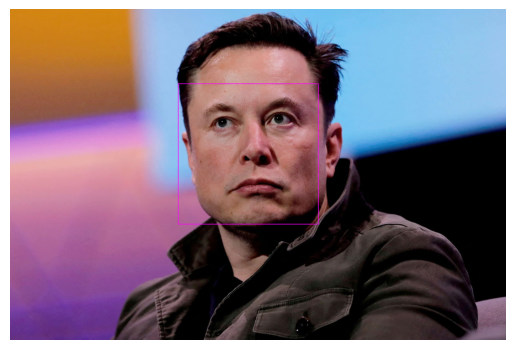

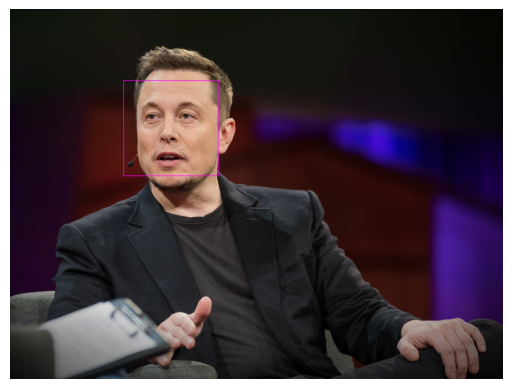

In [15]:
imgElon = face_recognition.load_image_file('D:/Deep learning/elonetrain.jpg')
imgElon1 = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
imgElonTest = face_recognition.load_image_file('D:/Deep learning/elonetest.jpg')
imgElonTest1 = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
#for train
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)
#for test
faceLocTest = face_recognition.face_locations(imgElonTest)[0]
encodeETest = face_recognition.face_encodings(imgElonTest)[0]
cv2.rectangle(imgElonTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)
plt.imshow(imgElon)  # Display the image
plt.axis('off')  # Remove the axis labels
plt.show()  # Show the plot

plt.imshow(imgElonTest)  # Display the image
plt.axis('off')  # Remove the axis labels
plt.show()  # Show the plot

In [16]:
result = face_recognition.compare_faces([encodeElon],encodeETest)
faceDis = face_recognition.face_distance([encodeElon],encodeETest)
print(result,faceDis)


[True] [0.3638206]


In [ ]:
path = 'D:/Deep learning/attendance'
images = []
classNames = []
myList = os.listdir(path)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
    

def findEncodings(images):
    encodeList = []
    for img in images:
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

def markAttendance(name):
    with open('data.csv','r+') as f:
        data = f.readlines()
        nameList = []
        for line in data:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtstr = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtstr}')


knownEncodedList = findEncodings(images)
print ("Encoding done")

cap = cv2.VideoCapture(0)
while True:
    success, img = cap.read()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    facesCur = face_recognition.face_locations(imgS)
    encodesCur = face_recognition.face_encodings(imgS,facesCur)
    for encodeFace, faceLoc in zip(encodesCur,facesCur):
        matches = face_recognition.compare_faces(knownEncodedList,encodeFace)
        faceDis = face_recognition.face_distance(knownEncodedList,encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)
        
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            print(name)
            y1,x2,y2,x1 = faceLoc
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(255,0,255),cv2.FILLED)
            cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markAttendance(name)


            
plt.imshow(img)  # Display the image
plt.axis('off')  # Remove the axis labels
plt.show()  # Show the plot




Encoding done
[0.78910129 0.93043206 0.82108907]
[0.75067598 0.89426405 0.81652494]
[0.42448944 0.66038282 0.7240808 ]
BILL
[0.40936743 0.63384362 0.72652168]
BILL
[0.38635508 0.67937017 0.75638195]
BILL
[0.40144771 0.61841784 0.74872148]
BILL
[0.73151014 0.89445482 0.6873178 ]
[0.74971554 0.82923116 0.73852061]
[0.68532012 0.71545749 0.64401328]
[0.75539617 0.77935472 0.57917743]
ELONE
[0.72837059 0.83327594 0.48801023]
ELONE
[0.71362467 0.81969861 0.5181999 ]
ELONE
[0.7478679  0.81721433 0.53053244]
ELONE
[0.66592324 0.40873415 0.82674534]
STEVE
[0.67279787 0.42180466 0.84095722]
STEVE
[0.65413754 0.4108752  0.81093198]
STEVE
[0.61370507 0.45297996 0.78440169]
STEVE
[0.6143657  0.47236729 0.79702499]
STEVE
[0.75658775 0.8431436  0.47683318]
ELONE
[0.74961885 0.84012185 0.47330273]
ELONE
[0.74143728 0.83647086 0.46066302]
ELONE
[0.74582174 0.85012635 0.47110073]
ELONE
[0.71592818 0.78761985 0.82584293]
[0.75961513 0.83433165 0.81199838]
[0.76633559 0.81756469 0.84113906]
[0.74389079 0

In [4]:
import csv

data = [
    ['Name', 'time']
]

filename = 'data.csv'
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in data:
        writer.writerow(row)
    csvfile.close()